In [86]:
import pandas as pd
import numpy as np
import glob
from sklearn.metrics import matthews_corrcoef
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!ls ../data/Archive/3713/

18630  18631  18632  18633  18635  23790  24084  24086	24087  24089  24093


In [3]:
import hashlib
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

In [125]:
team_3713 = np.sort(glob.glob("../data/Archive/3713/*"))
team_3714 = np.sort(glob.glob("../data/Archive/3714/*"))

In [127]:
team_3714

array(['../data/Archive/3714/18636', '../data/Archive/3714/18637',
       '../data/Archive/3714/18638', '../data/Archive/3714/23805',
       '../data/Archive/3714/23815', '../data/Archive/3714/23825',
       '../data/Archive/3714/24067', '../data/Archive/3714/24070',
       '../data/Archive/3714/24072', '../data/Archive/3714/24076',
       '../data/Archive/3714/24078'], dtype='<U26')

In [128]:
team_3713

array(['../data/Archive/3713/18630', '../data/Archive/3713/18631',
       '../data/Archive/3713/18632', '../data/Archive/3713/18633',
       '../data/Archive/3713/18635', '../data/Archive/3713/23790',
       '../data/Archive/3713/24084', '../data/Archive/3713/24086',
       '../data/Archive/3713/24087', '../data/Archive/3713/24089',
       '../data/Archive/3713/24093'], dtype='<U26')

In [135]:
team_3713_preds = [pd.read_csv(file)["label"].values for file in team_3713]
team_3713_names = [file.split("/")[-1] for file in team_3713]
team_3714_preds = [pd.read_csv(file)["label"].values for file in team_3714]
team_3714_names = [file.split("/")[-1] for file in team_3714]
vald_pred = [pd.read_csv("./submission_vlad.csv")["label"].values]

In [130]:
corr_matrix = np.zeros((len(team_3713_preds), len(team_3714_preds)))
for i, pred1 in enumerate(team_3713_preds):
    for j, pred2 in enumerate(team_3714_preds):
        c = pearsonr(np.around(pred1, 3), np.around(pred2, 3))[0]
        corr_matrix[i, j] = c

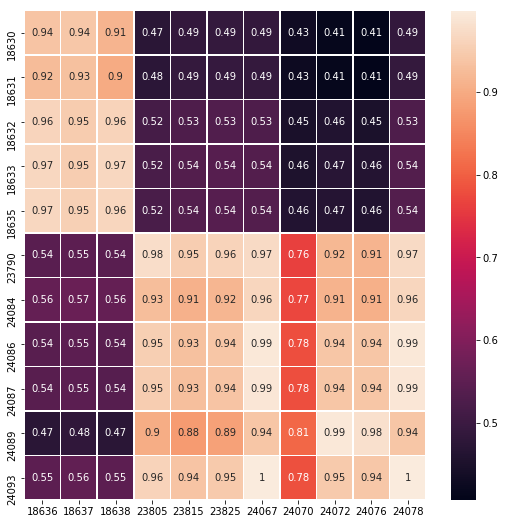

In [138]:
fig = plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, xticklabels=team_3714_names, yticklabels=team_3713_names)

In [82]:
corr_matrix_vlad = np.zeros((len(team_3713_preds), 1))
for i, pred1 in enumerate(team_3713_preds):
    c = pearsonr(pred1, vald_pred[0])[0]
    corr_matrix_vlad[i, 0] = c

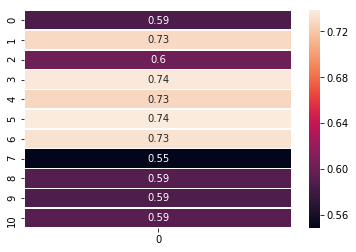

In [85]:
sns.heatmap(corr_matrix_vlad, annot=True, linewidths=.5)

In [106]:
team_bac= glob.glob("./bac_subs/*")
team_bac_preds = [pd.read_csv(file)["label"].values for file in team_bac]

In [107]:
corr_matrix_bac = np.zeros((len(team_bac_preds), len(team_bac_preds)))
for i, pred1 in enumerate(team_bac_preds):
    for j, pred2 in enumerate(team_bac_preds):
        c = pearsonr(np.around(pred1, 3), np.around(pred2, 3))[0]
        corr_matrix_bac[i, j] = c

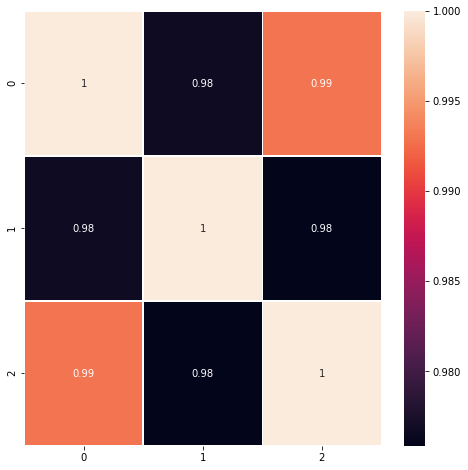

In [108]:
fig = plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix_bac, annot=True, linewidths=.5)

In [110]:
corr_matrix_bac

array([[1.        , 0.97675375, 0.99300526],
       [0.97675375, 1.        , 0.97586629],
       [0.99300526, 0.97586629, 1.        ]])